## Missing values

Next step was to explore missing data.\
Firstly I checked how many missing values is present in each selected time series - I checked missing values count and percent of data it constitutes results are presented in the below table

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/df.csv', parse_dates=['date'], date_format='%Y-%m-%d %H:%M:%S')

In [3]:
na_count = df.isnull().sum()
na_df = pd.DataFrame(na_count, columns=['na_count'])
na_df['na_prc'] = round(na_df['na_count'] / df.shape[0] * 100, 2)
na_df

,na_count,na_prc
date,0,0.00
puls,27,7.28
RR_skurczowe,98,26.42
RR_rozkurczowe,98,26.42
saturacja_prc,31,8.36
CVP_srednie,176,47.44
odd_wymuszane,12,3.23
odd_calkowite,30,8.09


A this point I knew how many missing values were present in the data. I, however, still didn't know what was the pattern of missing values occurrence. To explore spatial distribution of missing values I created plots showing each time series with missing data locations indicated as vertical lines.
To created plots using NA values visualization method described in article https://medium.com/@datasciencewizards/preprocessing-and-data-exploration-for-time-series-handling-missing-values-e5c507f6c71c

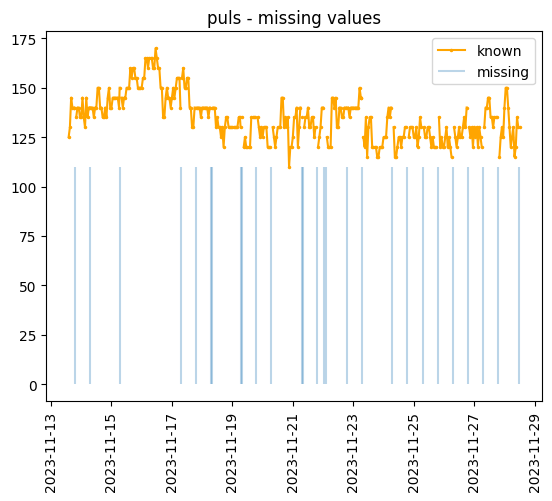

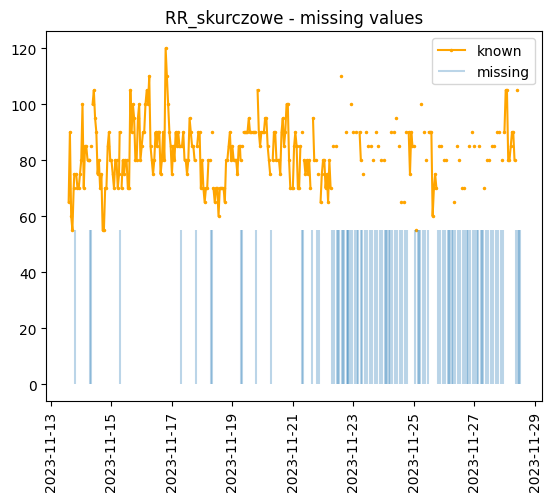

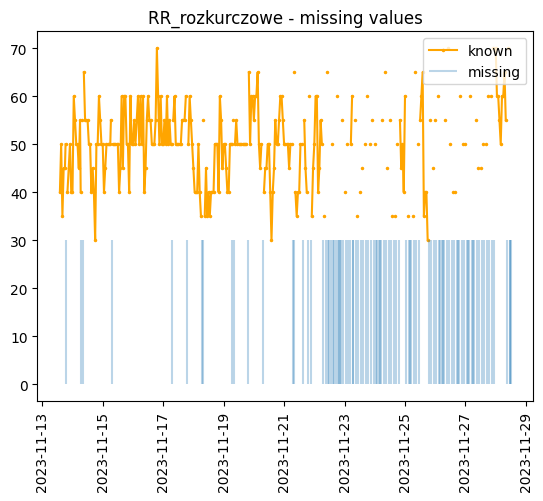

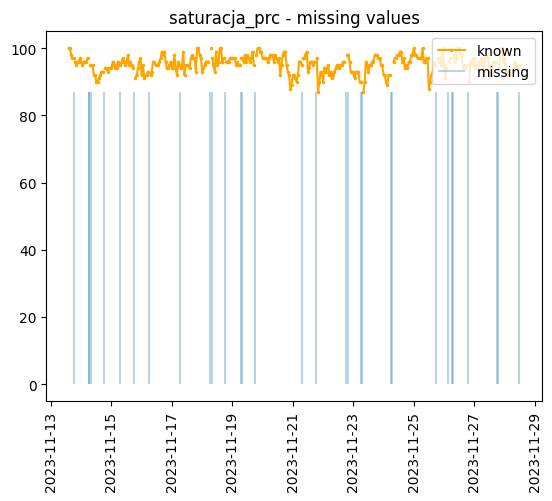

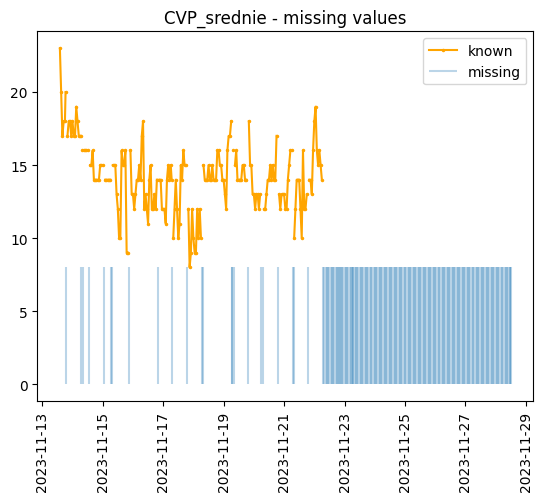

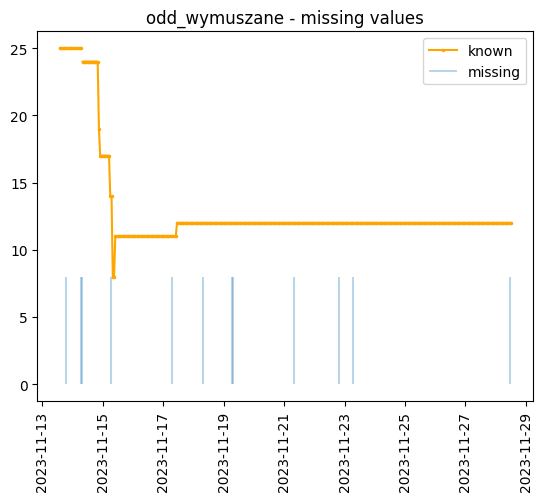

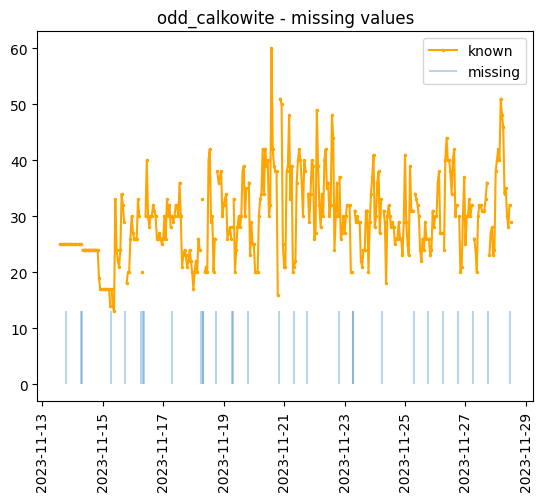

In [6]:
#better
df_idx = df.set_index('date')
for param in df_idx.columns:
    missing_values_loc = df_idx[param].isna()
    missing_values_dates = df_idx.index[missing_values_loc]
    
    plt.plot(df_idx.index, df_idx[param], marker='.', markersize=3, color='orange', label='known')

    plt.vlines(missing_values_dates,
               ymin=0,
               ymax=min(df_idx[param]),
               linestyle="-", alpha=.3, label = 'missing')
    
    # plt.xticks(ticks=x_ticks_locs, labels=x_ticks_labels, rotation = 90)
    plt.xticks(rotation = 90)
    plt.title(param + ' - missing values')
    plt.legend(loc='upper right')
    plt.show()

The exploration clearly showed a.o. that high percentage of missing values in CVP series resulted form record taking being ceased and that missing values distribution density in pulse and saturation time series was approximately constant.